In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import seaborn as sns


In [2]:
df = pd.read_csv('wines_SPA.csv')

In [3]:
df['year'] = df['year'].replace('N.V.', np.NaN)
imputer = SimpleImputer(strategy='most_frequent')
object_columns = df.select_dtypes(include=['object']).columns
df[object_columns] = imputer.fit_transform(df[object_columns])
df['year'] = df['year'].astype(np.int64)

In [4]:
numerical_columns = df.select_dtypes(include=['number']).columns
imputer = SimpleImputer(strategy='mean')
df[numerical_columns] = imputer.fit_transform(df[numerical_columns])

In [5]:
label_encoder = LabelEncoder()
df['wine_encoded'] = label_encoder.fit_transform(df['wine'])
label_encoder = LabelEncoder()
df['type_encoded'] = label_encoder.fit_transform(df['type'])
label_encoder = LabelEncoder()
df['winery_encoded'] = label_encoder.fit_transform(df['winery'])

In [6]:
label_encoder = LabelEncoder()
df['region_encoded'] = label_encoder.fit_transform(df['region'])

In [7]:
df.drop(columns=['wine','type','country','winery'],inplace=True)

In [8]:
df.drop(columns=['region'],inplace=True)

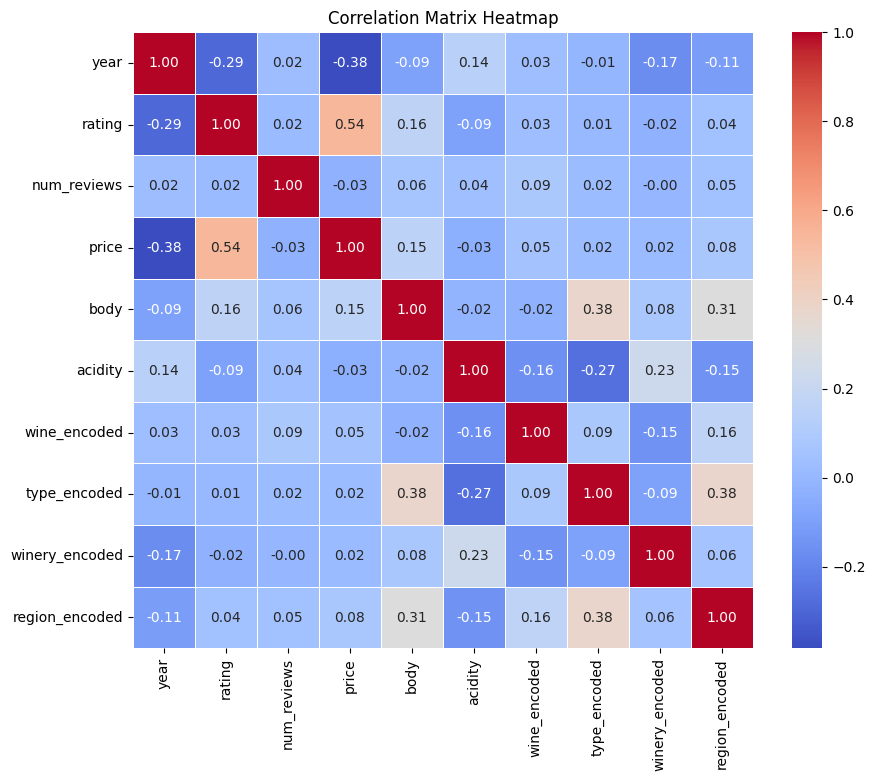

In [9]:
corr = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [19]:
df

,year,rating,num_reviews,price,body,acidity,wine_encoded,type_encoded,winery_encoded,region_encoded
0,2013.0,4.9,58.0,995.00,5.0,3.0,759,19,422,69
1,2018.0,4.9,31.0,313.50,4.0,2.0,819,18,33,74
2,2009.0,4.8,1793.0,324.95,5.0,3.0,778,11,447,57
3,1999.0,4.8,1705.0,692.96,5.0,3.0,778,11,447,57
4,1996.0,4.8,1309.0,778.06,5.0,3.0,778,11,447,57
...,...,...,...,...,...,...,...,...,...,...
7495,2016.0,4.2,392.0,19.98,4.0,3.0,619,12,159,59
7496,2018.0,4.2,390.0,16.76,4.0,3.0,440,9,158,53
7497,2017.0,4.2,390.0,24.45,4.0,3.0,302,10,334,24
7498,2011.0,4.2,389.0,64.50,5.0,3.0,342,11,316,57


In [11]:
X = df.drop(columns=['type_encoded'])
y = df['type_encoded']

In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score

classifiers = {
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier()
}
param_grids = {
    'Random Forest': {
        'n_estimators': [50, 100, 150],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'Logistic Regression': {
        'C': [0.1, 1, 10],
        'solver': ['liblinear', 'lbfgs']
    },
    'Decision Tree': {
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
}
best_scores = {}
best_params = {}
for name, clf in classifiers.items():
    print("Training", name)
    grid_search = GridSearchCV(estimator=clf, param_grid=param_grids[name], cv=5, scoring='accuracy')
    grid_search.fit(X, y)
    best_scores[name] = grid_search.best_score_
    best_params[name] = grid_search.best_params_
    print("Best Score:", best_scores[name])
    print("Best Parameters:", best_params[name])
    print()
print("Best Scores:")
for name, score in best_scores.items():
    print(name + ":", score)


Training Random Forest


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Best Score: 0.9326666666666666
Best Parameters: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 150}

Training Logistic Regression


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modu

Best Score: 0.7617333333333333
Best Parameters: {'C': 10, 'solver': 'liblinear'}

Training Decision Tree


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Best Score: 0.9349333333333332
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}

Best Scores:
Random Forest: 0.9326666666666666
Logistic Regression: 0.7617333333333333
Decision Tree: 0.9349333333333332


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
models = {
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier()
}
trained_models = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    trained_models[name] = model
model_accuracies = {}
for name, model in trained_models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    model_accuracies[name] = accuracy

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [14]:
model_accuracies

{'Random Forest': 0.9813333333333333,
 'SVM': 0.4673333333333333,
 'Logistic Regression': 0.54,
 'Decision Tree': 0.9826666666666667}

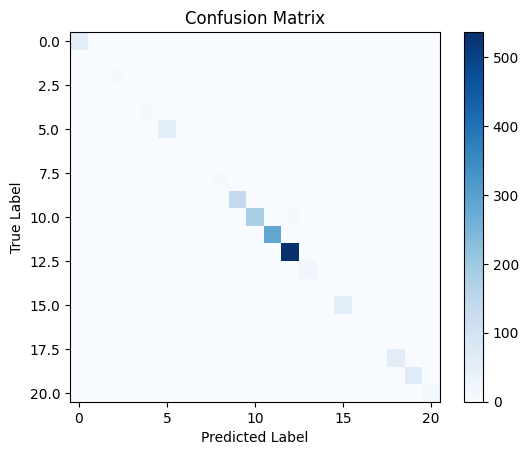

In [16]:
from sklearn.metrics import confusion_matrix
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [17]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = Sequential()
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.2)
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)
predictions = model.predict(X_test_scaled)

Epoch 1/10
150/150 [==============================] - 3s 9ms/step - loss: -129.8635 - accuracy: 0.0017 - val_loss: -463.6808 - val_accuracy: 0.0017
Epoch 2/10
150/150 [==============================] - 1s 7ms/step - loss: -1724.8661 - accuracy: 0.0015 - val_loss: -3807.1946 - val_accuracy: 0.0017
Epoch 3/10
150/150 [==============================] - 1s 4ms/step - loss: -7863.6489 - accuracy: 0.0015 - val_loss: -13447.0625 - val_accuracy: 0.0017
Epoch 4/10
150/150 [==============================] - 1s 4ms/step - loss: -21739.3281 - accuracy: 0.0015 - val_loss: -32374.3066 - val_accuracy: 0.0017
Epoch 5/10
150/150 [==============================] - 1s 5ms/step - loss: -46040.5859 - accuracy: 0.0015 - val_loss: -62961.1797 - val_accuracy: 0.0017
Epoch 6/10
150/150 [==============================] - 1s 4ms/step - loss: -83082.5625 - accuracy: 0.0015 - val_loss: -107533.9141 - val_accuracy: 0.0017
Epoch 7/10
150/150 [==============================] - 0s 2ms/step - loss: -134749.4688 - accur